## Rain and Temp Collection Data 

In [5]:
import requests
import xml.etree.ElementTree as ET
from datetime import datetime, timezone

In [2]:
# Server URL
#url = 'https://wcs-eo4sdcr.adamplatform.eu/wcs?service=WCS'

# Secondary Server URL with different collections
url = 'http://80.110.32.34/wcs?service=WCS'

In [3]:

# Use the requests library to GET the available collections
url_data = requests.get(url).text

# Parse the returned data to an xml element
xml_element = ET.fromstring(url_data)

In [4]:
# Get the list of all collection Ids and Bounding Boxes
# Bounding Box values depend on CRS
# Collection IDs can be found in: Capabilities -> Contents -> CoverageSummary -> CoverageId
for collection in xml_element[4].iter('{http://www.opengis.net/wcs/2.0}CoverageSummary'):
    print(collection[0].text) # CoverageId
    
    bounding_box = collection[3] # BoundingBox
    
    # Get the Lower/Upper corners and the Start/End Datetime of the Dataset
    lower_lat, lower_lon, start_time_epoch = bounding_box[0].text.split(' ')
    top_lat, top_lon, end_time_epoch = bounding_box[1].text.split(' ')
    
    # Convert epoch to datetime
    start_time = datetime.fromtimestamp(int(start_time_epoch), timezone.utc)
    end_time = datetime.fromtimestamp(int(end_time_epoch), timezone.utc)
    
    print("Lower Corner")
    print(lower_lat, lower_lon)
    print("Upper Corner")
    print(top_lat, top_lon)
    print("Available Dates")
    print(start_time)
    print(end_time)
    
    print('--- --- ---')

MOD11C1_LSTDAY_4326_005
Lower Corner
39.950000 20.000000
Upper Corner
45.000000 30.050000
Available Dates
2000-03-05 00:00:00+00:00
2021-01-17 00:00:00+00:00
--- --- ---
SoilMoisture_4326_01
Lower Corner
39.975999 19.901999
Upper Corner
45.096999 30.003998
Available Dates
2010-06-01 00:00:00+00:00
2021-01-01 00:00:00+00:00
--- --- ---
MOD07_Skin_Temperature_4326_005
Lower Corner
-68.709019 19.950001
Upper Corner
45.049998 156.650596
Available Dates
2000-02-24 00:00:00+00:00
2021-01-18 00:00:00+00:00
--- --- ---
MSG_4326_0000833
Lower Corner
40.597921 24.519355
Upper Corner
41.860832 26.201667
Available Dates
2008-07-01 00:00:00+00:00
2021-01-18 23:30:00+00:00
--- --- ---
S2AMSIL1CNDVI_4326_00001
Lower Corner
41.211928 24.487700
Upper Corner
41.927328 26.208843
Available Dates
2015-08-02 00:00:00+00:00
2021-01-30 00:00:00+00:00
--- --- ---
IMERG_DAY_ICE_SCALED_4326_01
Lower Corner
-90.000000 -179.900000
Upper Corner
89.900000 180.000000
Available Dates
2000-06-01 00:00:00+00:00
2020-01-

OSError: [Errno 22] Invalid argument

In [5]:
# Server URL
url = 'https://wcs-eo4sdcr.adamplatform.eu/wcs?service=WCS'

In [6]:
# Get the list of all collection Ids and Bounding Boxes
# Bounding Box values depend on CRS
# Collection IDs can be found in: Capabilities -> Contents -> CoverageSummary -> CoverageId
for collection in xml_element[4].iter('{http://www.opengis.net/wcs/2.0}CoverageSummary'):
    print(collection[0].text) # CoverageId
    
    bounding_box = collection[3] # BoundingBox
    
    # Get the Lower/Upper corners and the Start/End Datetime of the Dataset
    lower_lat, lower_lon, start_time_epoch = bounding_box[0].text.split(' ')
    top_lat, top_lon, end_time_epoch = bounding_box[1].text.split(' ')
    
    # Convert epoch to datetime
    start_time = datetime.fromtimestamp(int(start_time_epoch), timezone.utc)
    end_time = datetime.fromtimestamp(int(end_time_epoch), timezone.utc)
    
    print("Lower Corner")
    print(lower_lat, lower_lon)
    print("Upper Corner")
    print(top_lat, top_lon)
    print("Available Dates")
    print(start_time)
    print(end_time)
    
    print('--- --- ---')

MOD11C1_LSTDAY_4326_005
Lower Corner
39.950000 20.000000
Upper Corner
45.000000 30.050000
Available Dates
2000-03-05 00:00:00+00:00
2021-01-17 00:00:00+00:00
--- --- ---
SoilMoisture_4326_01
Lower Corner
39.975999 19.901999
Upper Corner
45.096999 30.003998
Available Dates
2010-06-01 00:00:00+00:00
2021-01-01 00:00:00+00:00
--- --- ---
MOD07_Skin_Temperature_4326_005
Lower Corner
-68.709019 19.950001
Upper Corner
45.049998 156.650596
Available Dates
2000-02-24 00:00:00+00:00
2021-01-18 00:00:00+00:00
--- --- ---
MSG_4326_0000833
Lower Corner
40.597921 24.519355
Upper Corner
41.860832 26.201667
Available Dates
2008-07-01 00:00:00+00:00
2021-01-18 23:30:00+00:00
--- --- ---
S2AMSIL1CNDVI_4326_00001
Lower Corner
41.211928 24.487700
Upper Corner
41.927328 26.208843
Available Dates
2015-08-02 00:00:00+00:00
2021-01-30 00:00:00+00:00
--- --- ---
IMERG_DAY_ICE_SCALED_4326_01
Lower Corner
-90.000000 -179.900000
Upper Corner
89.900000 180.000000
Available Dates
2000-06-01 00:00:00+00:00
2020-01-

OSError: [Errno 22] Invalid argument

In [1]:
import requests
import os
import xml.etree.ElementTree as ET
import numpy as np
from datetime import datetime, timedelta, date
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time

In [2]:
def get_data(time_t, lat, long, data_type):
    if data_type == 'rain':
        collection = 'IMERG_DAY_LIQUID_SCALED_4326_01'
        url = 'http://80.110.32.34/wcs?service=WCS&Request=GetCoverage&version=2.0.0 \
        &subset=unix({})&format=application/xml&CoverageId={}&subset=Lat({},{}) \
        &subset=Long({},{})'.format(time_t,collection,lat,lat,long,long)
   
    elif data_type == 'temp':
        collection = "ERA-Interim_temp2m_4326_05"
        url = 'https://wcs-eo4sdcr.adamplatform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0 \
        &subset=unix({})&format=application/xml&CoverageId={}&subset=Lat({},{}) \
        &subset=Long({},{})'.format(time_t,collection,lat,lat,long,long)
    else:
        return 0, 0
    
    #Create an XML Tree(. If no results are found, site return 404
    xml_tree = ET.fromstring(requests.get(url).text)

    #extract the time delta from the xml file in order to build later the time array
    for t in xml_tree.iter('{http://www.opengis.net/gml/3.2}lowerCorner'):
        # split string into list of coordinates
        time_min = int(t.text.split()[2])

    for t in xml_tree.iter('{http://www.opengis.net/gml/3.2}tupleList'):
        # split string into list temps
        data = t.text
        #print(dates)
    
    #split
    data = data.split()
    #split again
    data = data[0].split(',')

    if data_type != 'rain':
        for i in range(len(data)):
            data[i] = round(float(data[i])-273.15,2)
    
    #Get exact date of every measurement in steps
    for t in xml_tree.iter('{http://www.opengis.net/gml/3.3/rgrid}coefficients'):
        # extract dates
        dates = t.text
    dates = dates.split()

    
    # Create a List of data and a list of datetime for every measurement
    data_list, dates_list = [],[]
    for i in range (len(data)):
        data_list.append(float(data[i]))
        dates_list.append(datetime.fromtimestamp(time_min+int(dates[i])))
    print('Done!')

    return data_list, dates_list

In [63]:
time_t = '2015-10-01T00:00:00,2015-10-31T23:59:59'
lat,long = -1.286046,36.820959

In [64]:
rain_data, rain_dates = get_data(time_t,lat,long,"rain")
temp_data, temp_dates =get_data(time_t,lat,long,"temp")

Done!
Done!


In [65]:
#rain_data

In [66]:
temp_data

[18.0,
 20.72,
 28.36,
 23.38,
 18.89,
 20.09,
 27.81,
 22.14,
 18.44,
 21.11,
 26.89,
 21.74,
 17.69,
 19.57,
 25.57,
 20.93,
 17.6,
 19.34,
 26.8,
 20.88,
 15.58,
 19.52,
 28.03,
 21.85,
 17.33,
 20.83,
 22.38,
 19.23,
 17.22,
 19.86,
 26.04,
 20.57,
 17.72,
 19.68,
 26.69,
 21.92,
 17.88,
 20.1,
 28.01,
 22.66,
 18.33,
 19.54,
 26.59,
 21.76,
 17.04,
 20.03,
 26.55,
 18.65,
 17.61,
 19.17,
 26.57,
 21.23,
 17.36,
 20.05,
 26.11,
 21.99,
 17.43,
 20.18,
 28.0,
 21.77,
 17.99,
 20.12,
 25.86,
 21.66,
 18.14,
 19.25,
 25.37,
 21.33,
 17.84,
 18.5,
 25.16,
 21.56,
 17.95,
 19.01,
 25.19,
 21.54,
 17.46,
 20.15,
 26.88,
 22.14,
 17.99,
 21.32,
 27.46,
 22.48,
 18.27,
 18.95,
 25.44,
 21.03,
 17.85,
 18.43,
 25.06,
 21.58,
 18.3,
 20.49,
 26.56,
 22.87,
 17.86,
 21.11,
 27.13,
 22.46,
 17.57,
 21.55,
 27.92,
 21.9,
 18.63,
 22.1,
 24.88,
 20.78,
 18.64,
 21.05,
 25.69,
 21.52,
 18.36,
 19.57,
 25.25,
 21.39,
 18.13,
 19.5,
 26.38,
 21.48,
 18.21,
 21.07,
 26.67,
 21.09]

In [67]:
import pandas as pd

df_temp = pd.DataFrame({
                        'Date':temp_dates,
                        'Temp':temp_data,
                        'Type':'temp'
                        })
df_temp

,Date,Temp,Type
0,2015-10-01 02:00:00,18.00,temp
1,2015-10-01 08:00:00,20.72,temp
2,2015-10-01 14:00:00,28.36,temp
3,2015-10-01 20:00:00,23.38,temp
4,2015-10-02 02:00:00,18.89,temp
...,...,...,...
119,2015-10-30 19:00:00,21.48,temp
120,2015-10-31 01:00:00,18.21,temp
121,2015-10-31 07:00:00,21.07,temp
122,2015-10-31 13:00:00,26.67,temp


In [68]:
#df_temp.to_excel('Nairobi_{}.xls'.format(time_t),index=False) error because:
df_temp.to_excel('Nairobi_temp.xlsx'.format(time_t),index=False)

In [69]:
df_rain = pd.DataFrame({
                        'Date':rain_dates,
                        'Rain':rain_data,
                        'Type':'rain'
                        })
df_rain

,Date,Rain,Type
0,2015-10-01 02:00:00,1.0,rain
1,2015-10-04 02:00:00,0.1,rain
2,2015-10-05 02:00:00,1.9,rain
3,2015-10-06 02:00:00,2.7,rain
4,2015-10-07 02:00:00,3.2,rain
5,2015-10-08 02:00:00,0.3,rain
6,2015-10-09 02:00:00,0.6,rain
7,2015-10-10 02:00:00,0.1,rain
8,2015-10-11 02:00:00,0.7,rain
9,2015-10-12 02:00:00,1.3,rain


In [70]:
#df_rain.to_excel('Nairobi_{}.xls'.format(time_t),index=False) error because:
df_rain.to_excel('Nairobi_rain.xlsx'.format(time_t),index=False)

In [71]:
cities = {
    "Anzola dell'Emilia" : (44.5473518,11.1956296),
    "Argelato" : (44.6425000,11.3489259),
    "Baricella" : (44.6476666,11.5356481),  
}

In [72]:
cities

{"Anzola dell'Emilia": (44.5473518, 11.1956296),
 'Argelato': (44.6425, 11.3489259),
 'Baricella': (44.6476666, 11.5356481)}

In [73]:
list(cities.keys())[0]

"Anzola dell'Emilia"

In [74]:
for key,value in cities.items():
    print(value[0],value[1])  

44.5473518 11.1956296
44.6425 11.3489259
44.6476666 11.5356481


In [75]:
time_t = '2015-10-01T00:00:00,2016-10-01T23:59:59'
lat,long = 44.5473518,11.1956296 #Anzola

temp_data, temp_dates =get_data(time_t,lat,long,"temp")

Done!


In [76]:
df_temp = pd.DataFrame({
                        'Date':temp_dates,
                        'Temp':temp_data,
                        'City':list(cities.keys())[0]
                        })
df_temp

,Date,Temp,City
0,2015-10-01 02:00:00,13.19,Anzola dell'Emilia
1,2015-10-01 08:00:00,12.73,Anzola dell'Emilia
2,2015-10-01 14:00:00,14.15,Anzola dell'Emilia
3,2015-10-01 20:00:00,12.78,Anzola dell'Emilia
4,2015-10-02 02:00:00,13.45,Anzola dell'Emilia
...,...,...,...
1463,2016-09-30 20:00:00,20.31,Anzola dell'Emilia
1464,2016-10-01 02:00:00,15.84,Anzola dell'Emilia
1465,2016-10-01 08:00:00,14.51,Anzola dell'Emilia
1466,2016-10-01 14:00:00,23.78,Anzola dell'Emilia


In [16]:
cities = {
    "Anzola dell'Emilia" : (44.5473518,11.1956296),
    "Argelato" : (44.6425000,11.3489259),
    "Baricella" : (44.6476666,11.5356481),  
}

In [78]:
time_t = '2015-10-01T00:00:00,2015-10-02T23:59:59'

df_temp =pd.DataFrame({})

for key,value in cities.items():
    print(value[0],value[1])
    temp_data, temp_dates =get_data(time_t,value[0],value[1],"temp")
    df2 = pd.DataFrame({'Date':temp_dates,'Temp':temp_data})
    df2['City'] = key
    lat,long = value
    df2['Lat'] = lat
    df2['long'] = long
    #df2['Coord'] = value
    df_temp = df_temp.append(df2)

44.5473518 11.1956296
Done!
44.6425 11.3489259
Done!
44.6476666 11.5356481
Done!


In [79]:
df_temp

,Date,Temp,City,Lat,long
0,2015-10-01 02:00:00,13.19,Anzola dell'Emilia,44.547352,11.195630
1,2015-10-01 08:00:00,12.73,Anzola dell'Emilia,44.547352,11.195630
2,2015-10-01 14:00:00,14.15,Anzola dell'Emilia,44.547352,11.195630
3,2015-10-01 20:00:00,12.78,Anzola dell'Emilia,44.547352,11.195630
4,2015-10-02 02:00:00,13.45,Anzola dell'Emilia,44.547352,11.195630
5,2015-10-02 08:00:00,14.66,Anzola dell'Emilia,44.547352,11.195630
6,2015-10-02 14:00:00,16.54,Anzola dell'Emilia,44.547352,11.195630
7,2015-10-02 20:00:00,15.40,Anzola dell'Emilia,44.547352,11.195630
0,2015-10-01 02:00:00,13.31,Argelato,44.642500,11.348926
1,2015-10-01 08:00:00,12.99,Argelato,44.642500,11.348926


## Da Tabella dataframe a risultati time series

In [159]:
import pandas as pd
df =pd.DataFrame({ 'Città' :["Anzola dell'Emilia","Argelato", "Baricella"],
                   'Coord' : [(44.5473518,11.1956296), (44.6425000,11.3489259),(44.6476666,11.5356481)] 
                })
df

,Città,Coord
0,Anzola dell'Emilia,"(44.5473518, 11.1956296)"
1,Argelato,"(44.6425, 11.3489259)"
2,Baricella,"(44.6476666, 11.5356481)"


In [160]:
cities = dict(zip(df['Città'], df['Coord']))
cities

{"Anzola dell'Emilia": (44.5473518, 11.1956296),
 'Argelato': (44.6425, 11.3489259),
 'Baricella': (44.6476666, 11.5356481)}

In [161]:
time_t = '2015-10-01T00:00:00,2015-10-02T23:59:59'

df_temp =pd.DataFrame({})

for key,value in cities.items():
    print(value[0],value[1])
    temp_data, temp_dates =get_data(time_t,value[0],value[1],"temp")
    df2 = pd.DataFrame({'Date':temp_dates,'Temp':temp_data})
    df2['City'] = key
    lat,long = value
    df2['Lat'] = lat
    df2['long'] = long
    #df2['Coord'] = value
    df_temp = df_temp.append(df2)

44.5473518 11.1956296
Done!
44.6425 11.3489259
Done!
44.6476666 11.5356481
Done!


In [162]:
df_temp

,Date,Temp,City,Lat,long
0,2015-10-01 02:00:00,13.19,Anzola dell'Emilia,44.547352,11.195630
1,2015-10-01 08:00:00,12.73,Anzola dell'Emilia,44.547352,11.195630
2,2015-10-01 14:00:00,14.15,Anzola dell'Emilia,44.547352,11.195630
3,2015-10-01 20:00:00,12.78,Anzola dell'Emilia,44.547352,11.195630
4,2015-10-02 02:00:00,13.45,Anzola dell'Emilia,44.547352,11.195630
5,2015-10-02 08:00:00,14.66,Anzola dell'Emilia,44.547352,11.195630
6,2015-10-02 14:00:00,16.54,Anzola dell'Emilia,44.547352,11.195630
7,2015-10-02 20:00:00,15.40,Anzola dell'Emilia,44.547352,11.195630
0,2015-10-01 02:00:00,13.31,Argelato,44.642500,11.348926
1,2015-10-01 08:00:00,12.99,Argelato,44.642500,11.348926


### Da Dataframe a risultato (metodo finale)

In [47]:
import pandas as pd
df=pd.read_excel('Comuni_italia.xlsx')
df

,Regione,Provincia,Comune,Coord
0,Emialia Romagna,Bologna,Anzola dell'Emilia,"(44.5473518,11.1956296)"
1,Emialia Romagna,Bologna,Argelato,"(44.6425000,11.3489259)"
2,Emialia Romagna,Bologna,Baricella,"(44.6476666,11.5356481)"
3,Emialia Romagna,Bologna,Bazzano,"(44.5050017,11.0835247)"
4,Emialia Romagna,Bologna,Bentivoglio,"(44.6356481,11.4190740)"
...,...,...,...,...
336,Emialia Romagna,Rimini,San Clemente,"(43.9320630,12.6268890)"
337,Emialia Romagna,Rimini,San Giovanni in Marignano,"(43.9399840,12.7100560)"
338,Emialia Romagna,Rimini,Santarcangelo di Romagna,"(44.0645370,12.4498703)"
339,Emialia Romagna,Rimini,Torriana,"(43.9861035,12.3851344)"


In [18]:
df =pd.DataFrame({ 'Comune' :["Anzola dell'Emilia","Argelato", "Baricella"],
                   'Coord' : [(44.5473518,11.1956296), (44.6425000,11.3489259),(44.6476666,11.5356481)],
                   'Regione' : ["Emilia Romagna","Emilia Romagna","Emilia Romagna"]
                })
df

,Comune,Coord,Regione
0,Anzola dell'Emilia,"(44.5473518, 11.1956296)",Emilia Romagna
1,Argelato,"(44.6425, 11.3489259)",Emilia Romagna
2,Baricella,"(44.6476666, 11.5356481)",Emilia Romagna


In [19]:
time_t = '2015-10-01T00:00:00,2015-10-02T23:59:59'

In [21]:
df_temp =pd.DataFrame({})

for index, row in df.iterrows():
    print(row['Comune'], row['Coord'])
    temp_data, temp_dates =get_data(time_t,row['Coord'][0],row['Coord'][1],"temp")
    df2 = pd.DataFrame({'Date':temp_dates,'Temp':temp_data})
    df2['City'] = row['Comune']
    lat,long = row['Coord'][0],row['Coord'][1]
    df2['Lat'] = lat
    df2['Long'] = long
    df2['Region'] = row['Regione']
    df_temp = df_temp.append(df2)
df_temp

Anzola dell'Emilia (44.5473518, 11.1956296)
Done!
Argelato (44.6425, 11.3489259)
Done!
Baricella (44.6476666, 11.5356481)
Done!


,Date,Temp,City,Lat,Long,Region
0,2015-10-01 02:00:00,13.19,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
1,2015-10-01 08:00:00,12.73,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
2,2015-10-01 14:00:00,14.15,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
3,2015-10-01 20:00:00,12.78,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
4,2015-10-02 02:00:00,13.45,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
5,2015-10-02 08:00:00,14.66,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
6,2015-10-02 14:00:00,16.54,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
7,2015-10-02 20:00:00,15.40,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
0,2015-10-01 02:00:00,13.31,Argelato,44.642500,11.348926,Emilia Romagna
1,2015-10-01 08:00:00,12.99,Argelato,44.642500,11.348926,Emilia Romagna


In [22]:
df_temp.dtypes

Date      datetime64[ns]
Temp             float64
City              object
Lat              float64
Long             float64
Region            object
dtype: object

In [23]:
df_temp.groupby('Date').count()
#df_temp.resample('D').mean()


,Temp,City,Lat,Long,Region
Date,,,,,
2015-10-01 02:00:00,3,3,3,3,3
2015-10-01 08:00:00,3,3,3,3,3
2015-10-01 14:00:00,3,3,3,3,3
2015-10-01 20:00:00,3,3,3,3,3
2015-10-02 02:00:00,3,3,3,3,3
2015-10-02 08:00:00,3,3,3,3,3
2015-10-02 14:00:00,3,3,3,3,3
2015-10-02 20:00:00,3,3,3,3,3


In [24]:
#df_temp['day'] = df_temp['Date'].dt.day 
#temp_max = df_temp.groupby(['day'])["Temp"].max()
#temp_max

In [48]:
df_temp.set_index("Date", inplace=True)
df_temp

,Temp,City,Lat,Long,Region
Date,,,,,
2015-10-01,13.2125,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
2015-10-02,15.0125,Anzola dell'Emilia,44.547352,11.195630,Emilia Romagna
2015-10-01,13.5425,Argelato,44.642500,11.348926,Emilia Romagna
2015-10-02,15.5275,Argelato,44.642500,11.348926,Emilia Romagna
2015-10-01,13.5425,Baricella,44.647667,11.535648,Emilia Romagna
2015-10-02,15.5275,Baricella,44.647667,11.535648,Emilia Romagna


In [26]:
df_resampled = df_temp[['Temp','City']].copy()

#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
#df_resampled.resample('M').sum()
df_resampled.resample('D').mean()


,Temp
Date,
2015-10-01,13.432500
2015-10-02,15.355833


## Inizia Qui -

In [25]:
import pandas as pd
#df=pd.read_excel('test.xlsx')
df=pd.read_excel('Comuni_italia.xlsx')
df

,Regione,Provincia,Comune,Coord
0,Emialia Romagna,Bologna,Anzola dell'Emilia,"(44.5473518,11.1956296)"
1,Emialia Romagna,Bologna,Argelato,"(44.6425000,11.3489259)"
2,Emialia Romagna,Bologna,Baricella,"(44.6476666,11.5356481)"
3,Emialia Romagna,Bologna,Bazzano,"(44.5050017,11.0835247)"
4,Emialia Romagna,Bologna,Bentivoglio,"(44.6356481,11.4190740)"
...,...,...,...,...
336,Emialia Romagna,Rimini,San Clemente,"(43.9320630,12.6268890)"
337,Emialia Romagna,Rimini,San Giovanni in Marignano,"(43.9399840,12.7100560)"
338,Emialia Romagna,Rimini,Santarcangelo di Romagna,"(44.0645370,12.4498703)"
339,Emialia Romagna,Rimini,Torriana,"(43.9861035,12.3851344)"


In [26]:
time_t = '2014-10-01T00:00:00,2018-07-31T23:59:59'

In [27]:
df_temp =pd.DataFrame({})

for index, row in df.iterrows():
    print(row['Comune'], row['Coord'])
    temp_data, temp_dates =get_data(time_t,row['Coord'][0],row['Coord'][1],"temp")
    df2 = pd.DataFrame({'Date':temp_dates,'Temp':temp_data})
    df2['City'] = row['Comune']
    df2['Lat'] = row['Coord'][1:10]
    df2['Long'] = row['Coord'][12:-1]
    df2['Region'] = row['Regione']
    df_temp = df_temp.append(df2)

df_temp['day'] = df_temp['Date'].dt.day 
df_temp

Anzola dell'Emilia (44.5473518,11.1956296)
Done!
Argelato (44.6425000,11.3489259)
Done!
Baricella (44.6476666,11.5356481)
Done!
Bazzano (44.5050017,11.0835247)
Done!
Bentivoglio (44.6356481,11.4190740)
Done!
Bologna (44.4944456,11.3492311)
Done!
Borgo Tossignano (44.2776666,11.5912592)
Done!
Budrio (44.5381481,11.5347037)
Done!
Calderara di Reno (44.5640740,11.2722037)
Done!
Camugnano (44.1719868,11.0842818)
Done!
Casalecchio di Reno (44.4765740,11.2770555)
Done!
Casalfiumanese (44.2978148,11.6250000)
Done!
Castel d'Aiano (44.2768888,11.0004814)
Done!
Castel del Rio (44.2159845,11.5037525)
Done!
Castel di Casio (44.1639074,11.0368888)
Done!
Castel Guelfo di Bologna (44.4317407,11.6789259)
Done!
Castel Maggiore (44.5781481,11.3617222)
Done!
Castel San Pietro Terme (44.3995370,11.5859629)
Done!
Castello d'Argile (44.6800000,11.2970555)
Done!
Castello di Serravalle (44.4378661,11.0313911)
Done!
Castenaso (44.5090620,11.4691759)
Done!
Castiglione dei Pepoli (44.1431236,11.1643061)
Done!
Cr

Done!
Roccabianca (45.0103148,10.2204814)
Done!
Sala Baganza (44.7174120,10.2320660)
Done!
Salsomaggiore Terme (44.8139250,99.821521)
Done!
San Secondo Parmense (44.9226666,10.2303148)
Done!
Sissa (44.9603333,10.2617407)
Done!
Solignano (44.6140740,99.765740)
Done!
Soragna (44.9299970,10.1256820)
Done!
Sorbolo (44.8435920,10.4476010)
Done!
Terenzo (44.6109444,10.0907962)
Done!
Tizzano Val Parma (44.5215740,10.2009629)
Done!
Tornolo (44.4853962,96.256260)
Done!
Torrile (44.9248518,10.3257962)
Done!
Traversetolo (44.6402363,10.3813638)
Done!
Trecasali (44.9367222,10.2732962)
Done!
Valmozzola (44.5689330,98.836765)
Done!
Varano de' Melegari (44.6890740,10.0125000)
Done!
Varsi (44.6619680,98.448710)
Done!
Zibello (45.0195555,10.1307962)
Done!
Agazzano (44.9467407,95.197037)
Done!
Alseno (44.8969870,99.665620)
Done!
Besenzone (44.9870370,99.548703)
Done!
Bettola (44.7786672,96.084369)
Done!
Bobbio (44.7715740,93.864074)
Done!
Borgonovo Val Tidone (45.0153148,94.445370)
Done!
Cadeo (44.97459

,Date,Temp,City,Lat,Long,Region,day
0,2014-10-01 02:00:00,25.20,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1
1,2014-10-01 08:00:00,24.11,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1
2,2014-10-01 14:00:00,26.05,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1
3,2014-10-01 20:00:00,25.60,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1
4,2014-10-02 02:00:00,24.53,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,2
...,...,...,...,...,...,...,...
5595,2018-07-30 20:00:00,25.18,Verucchio,43.983324,12.4229652,Emialia Romagna,30
5596,2018-07-31 02:00:00,24.87,Verucchio,43.983324,12.4229652,Emialia Romagna,31
5597,2018-07-31 08:00:00,23.32,Verucchio,43.983324,12.4229652,Emialia Romagna,31
5598,2018-07-31 14:00:00,25.82,Verucchio,43.983324,12.4229652,Emialia Romagna,31


In [28]:
df_temp['Date2']=df_temp['Date']
df_temp['Date2']=df_temp['Date2'].dt.strftime('%Y-%m-%d')
df_temp

,Date,Temp,City,Lat,Long,Region,day,Date2
0,2014-10-01 02:00:00,25.20,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1,2014-10-01
1,2014-10-01 08:00:00,24.11,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1,2014-10-01
2,2014-10-01 14:00:00,26.05,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1,2014-10-01
3,2014-10-01 20:00:00,25.60,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,1,2014-10-01
4,2014-10-02 02:00:00,24.53,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,2,2014-10-02
...,...,...,...,...,...,...,...,...
5595,2018-07-30 20:00:00,25.18,Verucchio,43.983324,12.4229652,Emialia Romagna,30,2018-07-30
5596,2018-07-31 02:00:00,24.87,Verucchio,43.983324,12.4229652,Emialia Romagna,31,2018-07-31
5597,2018-07-31 08:00:00,23.32,Verucchio,43.983324,12.4229652,Emialia Romagna,31,2018-07-31
5598,2018-07-31 14:00:00,25.82,Verucchio,43.983324,12.4229652,Emialia Romagna,31,2018-07-31


In [29]:
df_temp = df_temp.groupby(['City','day','Date2','Region','Lat','Long'],as_index=False)['Temp'].mean()
df_temp

,City,day,Date2,Region,Lat,Long,Temp
0,Agazzano,1,2014-10-01,Emialia Romagna,44.946740,95.197037,25.2400
1,Agazzano,1,2014-11-01,Emialia Romagna,44.946740,95.197037,25.7075
2,Agazzano,1,2014-12-01,Emialia Romagna,44.946740,95.197037,25.3525
3,Agazzano,1,2015-01-01,Emialia Romagna,44.946740,95.197037,25.1400
4,Agazzano,1,2015-02-01,Emialia Romagna,44.946740,95.197037,26.1025
...,...,...,...,...,...,...,...
477395,Zola Predosa,31,2017-12-31,Emialia Romagna,44.490629,11.2193888,26.7400
477396,Zola Predosa,31,2018-01-31,Emialia Romagna,44.490629,11.2193888,26.6125
477397,Zola Predosa,31,2018-03-31,Emialia Romagna,44.490629,11.2193888,28.1325
477398,Zola Predosa,31,2018-05-31,Emialia Romagna,44.490629,11.2193888,27.1925


In [30]:
df_temp['Date']=pd.to_datetime(df_temp['Date2'])
df_temp = df_temp.drop(['Date2','day'],axis=1)

cols = ['Date','Temp','City','Lat','Long','Region']
df_temp = df_temp[cols]
df_temp

,Date,Temp,City,Lat,Long,Region
0,2014-10-01,25.2400,Agazzano,44.946740,95.197037,Emialia Romagna
1,2014-11-01,25.7075,Agazzano,44.946740,95.197037,Emialia Romagna
2,2014-12-01,25.3525,Agazzano,44.946740,95.197037,Emialia Romagna
3,2015-01-01,25.1400,Agazzano,44.946740,95.197037,Emialia Romagna
4,2015-02-01,26.1025,Agazzano,44.946740,95.197037,Emialia Romagna
...,...,...,...,...,...,...
477395,2017-12-31,26.7400,Zola Predosa,44.490629,11.2193888,Emialia Romagna
477396,2018-01-31,26.6125,Zola Predosa,44.490629,11.2193888,Emialia Romagna
477397,2018-03-31,28.1325,Zola Predosa,44.490629,11.2193888,Emialia Romagna
477398,2018-05-31,27.1925,Zola Predosa,44.490629,11.2193888,Emialia Romagna


In [31]:
df_temp.to_excel('df_temp-ER.xlsx',index=None)

## Timeseries Rain Daily

In [381]:
# import pandas as pd
# df=pd.read_excel('Comuni_italia.xlsx')
# df

,Regione,Provincia,Comune,Coord
0,Emialia Romagna,Bologna,Anzola dell'Emilia,"(44.5473518,11.1956296)"
1,Emialia Romagna,Bologna,Argelato,"(44.6425000,11.3489259)"
2,Emialia Romagna,Bologna,Baricella,"(44.6476666,11.5356481)"
3,Emialia Romagna,Bologna,Bazzano,"(44.5050017,11.0835247)"
4,Emialia Romagna,Bologna,Bentivoglio,"(44.6356481,11.4190740)"
...,...,...,...,...
336,Emialia Romagna,Rimini,San Clemente,"(43.9320630,12.6268890)"
337,Emialia Romagna,Rimini,San Giovanni in Marignano,"(43.9399840,12.7100560)"
338,Emialia Romagna,Rimini,Santarcangelo di Romagna,"(44.0645370,12.4498703)"
339,Emialia Romagna,Rimini,Torriana,"(43.9861035,12.3851344)"


In [382]:
# df =pd.DataFrame({ 'Città' :["Anzola dell'Emilia","Argelato", "Baricella"],
#                    'Coord' : [(44.5473518,11.1956296), (44.6425000,11.3489259),(44.6476666,11.5356481)],
#                    'Regione' : ["Emilia Romagna","Emilia Romagna","Emilia Romagna"]
#                 })
# df

In [32]:
df_rain =pd.DataFrame({})

for index, row in df.iterrows():
    print(row['Comune'], row['Coord'])
    rain_data, rain_dates = get_data(time_t,row['Coord'][0],row['Coord'][1],"rain")
    df2 = pd.DataFrame({'Date':rain_dates,'Rain':rain_data})
    df2['City'] = row['Comune']
    df2['Lat'] = row['Coord'][1:10]
    df2['Long'] = row['Coord'][12:-1]
    df2['Region'] = row['Regione']
    df_rain = df_rain.append(df2)
df_rain

Anzola dell'Emilia (44.5473518,11.1956296)
Done!
Argelato (44.6425000,11.3489259)
Done!
Baricella (44.6476666,11.5356481)
Done!
Bazzano (44.5050017,11.0835247)
Done!
Bentivoglio (44.6356481,11.4190740)
Done!
Bologna (44.4944456,11.3492311)
Done!
Borgo Tossignano (44.2776666,11.5912592)
Done!
Budrio (44.5381481,11.5347037)
Done!
Calderara di Reno (44.5640740,11.2722037)
Done!
Camugnano (44.1719868,11.0842818)
Done!
Casalecchio di Reno (44.4765740,11.2770555)
Done!
Casalfiumanese (44.2978148,11.6250000)
Done!
Castel d'Aiano (44.2768888,11.0004814)
Done!
Castel del Rio (44.2159845,11.5037525)
Done!
Castel di Casio (44.1639074,11.0368888)
Done!
Castel Guelfo di Bologna (44.4317407,11.6789259)
Done!
Castel Maggiore (44.5781481,11.3617222)
Done!
Castel San Pietro Terme (44.3995370,11.5859629)
Done!
Castello d'Argile (44.6800000,11.2970555)
Done!
Castello di Serravalle (44.4378661,11.0313911)
Done!
Castenaso (44.5090620,11.4691759)
Done!
Castiglione dei Pepoli (44.1431236,11.1643061)
Done!
Cr

Done!
Roccabianca (45.0103148,10.2204814)
Done!
Sala Baganza (44.7174120,10.2320660)
Done!
Salsomaggiore Terme (44.8139250,99.821521)
Done!
San Secondo Parmense (44.9226666,10.2303148)
Done!
Sissa (44.9603333,10.2617407)
Done!
Solignano (44.6140740,99.765740)
Done!
Soragna (44.9299970,10.1256820)
Done!
Sorbolo (44.8435920,10.4476010)
Done!
Terenzo (44.6109444,10.0907962)
Done!
Tizzano Val Parma (44.5215740,10.2009629)
Done!
Tornolo (44.4853962,96.256260)
Done!
Torrile (44.9248518,10.3257962)
Done!
Traversetolo (44.6402363,10.3813638)
Done!
Trecasali (44.9367222,10.2732962)
Done!
Valmozzola (44.5689330,98.836765)
Done!
Varano de' Melegari (44.6890740,10.0125000)
Done!
Varsi (44.6619680,98.448710)
Done!
Zibello (45.0195555,10.1307962)
Done!
Agazzano (44.9467407,95.197037)
Done!
Alseno (44.8969870,99.665620)
Done!
Besenzone (44.9870370,99.548703)
Done!
Bettola (44.7786672,96.084369)
Done!
Bobbio (44.7715740,93.864074)
Done!
Borgonovo Val Tidone (45.0153148,94.445370)
Done!
Cadeo (44.97459

,Date,Rain,City,Lat,Long,Region
0,2014-10-01 02:00:00,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
1,2014-10-05 02:00:00,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
2,2014-10-06 02:00:00,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
3,2014-10-07 02:00:00,0.9,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
4,2014-10-08 02:00:00,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
...,...,...,...,...,...,...
777,2018-07-18 02:00:00,0.2,Verucchio,43.983324,12.4229652,Emialia Romagna
778,2018-07-22 02:00:00,0.1,Verucchio,43.983324,12.4229652,Emialia Romagna
779,2018-07-23 02:00:00,0.1,Verucchio,43.983324,12.4229652,Emialia Romagna
780,2018-07-24 02:00:00,0.4,Verucchio,43.983324,12.4229652,Emialia Romagna


In [33]:
df_rain['Date'] = pd.to_datetime(df_rain['Date']).dt.date
df_rain

,Date,Rain,City,Lat,Long,Region
0,2014-10-01,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
1,2014-10-05,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
2,2014-10-06,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
3,2014-10-07,0.9,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
4,2014-10-08,0.1,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna
...,...,...,...,...,...,...
777,2018-07-18,0.2,Verucchio,43.983324,12.4229652,Emialia Romagna
778,2018-07-22,0.1,Verucchio,43.983324,12.4229652,Emialia Romagna
779,2018-07-23,0.1,Verucchio,43.983324,12.4229652,Emialia Romagna
780,2018-07-24,0.4,Verucchio,43.983324,12.4229652,Emialia Romagna


In [34]:
df_rain.to_excel('df_rain-ER.xlsx')

In [35]:
df_tot = pd.concat([df_rain.set_index(['Date','City','Lat','Long','Region']),df_temp.set_index(['Date','City','Lat','Long','Region'])], axis=1, join='inner')
df_tot

,,,,,Rain,Temp
Date,City,Lat,Long,Region,,
2014-10-01,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,0.1,25.2400
2014-10-05,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,0.1,24.8350
2014-10-06,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,0.1,25.1625
2014-10-07,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,0.9,25.7550
2014-10-08,Anzola dell'Emilia,44.547351,11.1956296,Emialia Romagna,0.1,25.3400
...,...,...,...,...,...,...
2018-07-18,Verucchio,43.983324,12.4229652,Emialia Romagna,0.2,24.6450
2018-07-22,Verucchio,43.983324,12.4229652,Emialia Romagna,0.1,23.6950
2018-07-23,Verucchio,43.983324,12.4229652,Emialia Romagna,0.1,24.0500


In [36]:
df_tot.isnull().sum()

Rain    0
Temp    0
dtype: int64

In [37]:
df_tot.to_excel('tot.xlsx')

## Atene vs Roma

In [14]:
def temp_per_month(temp_data, temp_dates):
    temp_data_m, temp_dates_m, temp_sum, temp_counter = [],[],0,0
    month = temp_dates[0].month

    # Calculate the mean for every month and append result to list
    for i in range (len(temp_data)):
        if month == temp_dates[i].month:
            temp_sum += float(temp_data[i])
            temp_counter +=1
        else:
            temp_mean = temp_sum / temp_counter
            temp_data_m.append(temp_mean)
            temp_dates_m.append(temp_dates[i-1].strftime('%Y-%m'))

            month = temp_dates[i].month
            temp_sum = 0
            temp_sum += float(temp_data[i])
            temp_counter = 1

    #Add last month
    temp_mean = temp_sum / temp_counter
    temp_data_m.append(temp_mean)
    temp_dates_m.append(temp_dates[i-1].strftime('%Y-%m'))
    
    return temp_data_m, temp_dates_m

In [15]:
def rain_per_month(rain_data, rain_dates, agg='sum'):
    rain_data_m, rain_dates_m, rain_sum = [],[],0
    month = rain_dates[0].month

    #Calculate sum/mean for every month and append result to a list
    # Some days have no values, so we divide by the days of the month to get a mean
    for i in range (len(rain_data)):
        if month == rain_dates[i].month:
            rain_sum +=float(rain_data[i])
        else:
            if agg == "mean":
                rain_mean = rain_sum/ calendar.monthrange(rain_dates[i-1].year,rain_dates[i-1].month)[1]
                rain_data_m.append(rain_mean)
            else:
                rain_data_m.append(rain_sum)
            rain_dates_m.append(rain_dates[i-1].strftime('%Y-%m'))

            month = rain_dates[i].month
            rain_sum = 0
            rain_sum += float(rain_data[i])
    
    if agg == 'mean':
        rain_mean = rain_sum /calendar.monthrange(rain_dates[i-1].year,rain_dates[i-1].month)[1]
        rain_data_m.append(rain_mean)
    else:
        rain_data_m.append(rain_sum)
    rain_dates_m.append(rain_dates[i-1].strftime('%Y-%m'))

    return rain_data_m, rain_dates_m

In [16]:
### Get Latitude - Longitude of a city

In [17]:
def get_lat_long(city, country):
    geolocator = Nominatim(user_agent="rain_temp_app")

    # Add delay comply with policy in case function inside a loop
    time.sleep(1)

    if city != None:
        try:
            loc = geolocator.geocode(str(city + ',' + country))
            return (loc.latitude, loc.longitude)
        except:
            return np.nan, np.nan
    else:
        try:
            # Geolocate the cente of country
            loc= geolocator.geocode(country)
            return (loc.latitude, loc. longitude)
        except:
            return np.nan, np.nan

In [18]:
def create_barplot (data, dates, data_type):
    data_array = np.array(data)
    data_array = data_array.flatten()

    f, ax = plt.subplots(figsize=(12,6))
    sns.barplot(x= np.arange (0, len(data_array)), y=data_array, palette='rocket')
    ax.set_xticklabels(labels=dates, rotation=45,ha='right')

    if data_type == 'rain':
        ax.set(xlabel='Dates Range',ylabel='Precipitation in [mm]')
    else:
        ax.set(xlabel='Dates Range',ylabel='Temperature in [°C]')

In [19]:
def create_graphplot(data,dates,data_type):
    data_array = np.array(data)
    #data_array = data.array[:].flatten()

    f,ax = plt.subplots(figsize=(12,6))
    if data_type == 'rain':
        plt.plot(dates,data_array,'o-',label='rain')
        ax.set(xlabel='Dates Range',ylabel='Precipitation in [mm]')
    else:
        plt.plot(dates,data_array,'o-',label='temp')
        ax.set(xlabel='Dates Range',ylabel='Temperature in [°C]')

    ax.legend(loc='upper left')
    ax.set_xticklabels(labels=dates, rotation=45, ha='right')
    ax.grid()

In [20]:
city = 'Athens'
country = 'Greece'
time_t = '2017-01-01T00:00:00,2017-12-31T23:59:59'

lat,long = get_lat_long(city, country)

rain_data, rain_dates = get_data(time_t,lat,long,"rain")
temp_data, temp_dates =get_data(time_t,lat,long,"temp")

rain_data_m, rain_dates_m = rain_per_month(rain_data,rain_dates,'sum')
temp_data_m, temp_dates_m = temp_per_month(temp_data,temp_dates)

Done!
Done!


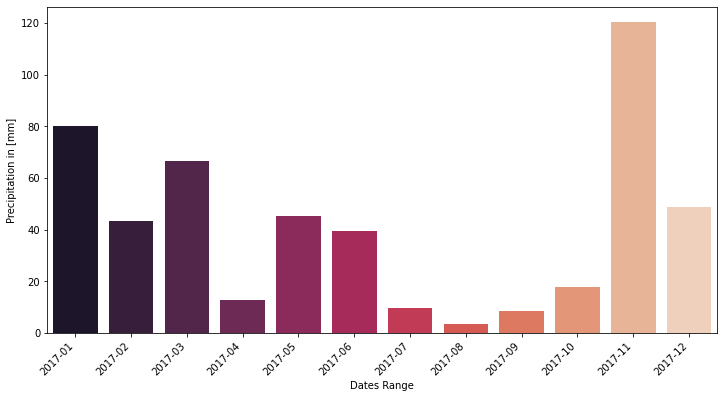

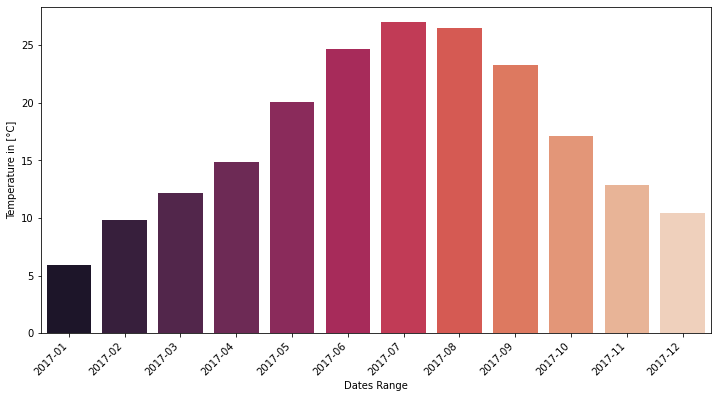

In [21]:
create_barplot(rain_data_m,rain_dates_m,'rain')
create_barplot(temp_data_m,temp_dates_m,'temp')

<ipython-input-19-12996a213f66>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dates, rotation=45, ha='right')
<ipython-input-19-12996a213f66>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=dates, rotation=45, ha='right')


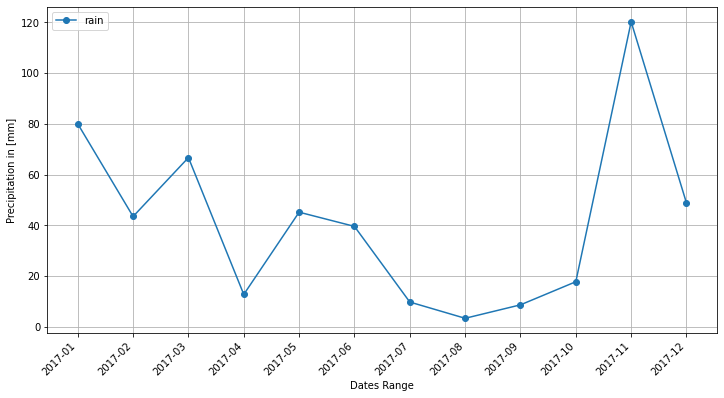

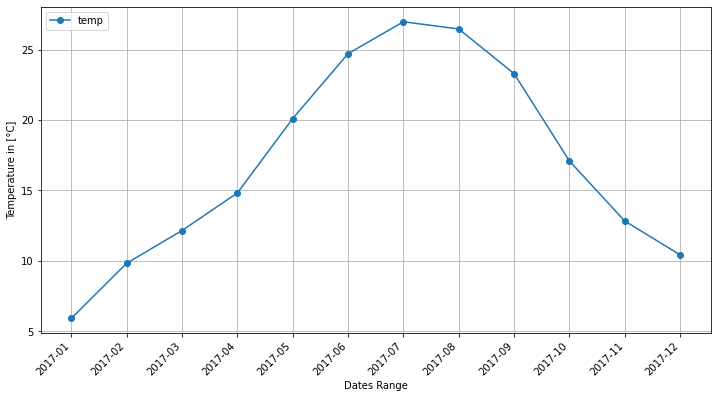

In [22]:
create_graphplot(rain_data_m,rain_dates_m,'rain')
create_graphplot(temp_data_m,temp_dates_m,'temp')

In [25]:
def compare_rain_years(lat, long,year1,year2):
    months = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
    f,ax = plt.subplots(figsize=(12,6))

    #add a subplot for every 2 years
    while year1<=year2:
        time_t = '{}-01-01T00:00:00,{}-12-31T23:59:59'.format(year1,year2)
        rain_data, rain_datas = get_data(time_t, lat, long, 'rain')
        rain_data_m, rain_dates_m = rain_per_month(rain_data, rain_dates, 'sum')

        data_array = np.array(rain_data_m)
        data_array = data_array.flatten()
        print(len(data_array))

        plt.plot(months, data_array, 'o-', label=year1)

        year1 +=1
    
    ## Add to detail
    ax.set_xticklabels(labels=months, rotation=45, ha='right')
    ax.legend(loc='upper left')
    ax.set(xlabel='Months Range', ylabel='Precipitation in [mm]')
    ax.grid()

In [26]:
def compare_temp_years(lat, long,year1,year2):
    months = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']
    f,ax = plt.subplots(figsize=(12,6))

    #add a subplot for every 2 years
    while year1<=year2:
        time_t = '{}-01-01T00:00:00,{}-12-31T23:59:59'.format(year1,year2)
        temp_data, temp_datas = get_data(time_t, lat, long, 'temp')
        temp_data_m, temp_dates_m = rain_per_month(temp_data, temp_dates)

        data_array = np.array(rain_data_m)
        data_array = data_array.flatten()

        plt.plot(months, data_array, 'o-', label=year1)

        year1 +=1
    
    ## Add to detail
    ax.set_xticklabels(labels=months, rotation=45, ha='right')
    ax.legend(loc='upper left')
    ax.set(xlabel='Months Range', ylabel='Temperature in [°C]')
    ax.grid()

Done!


IndexError: list index out of range

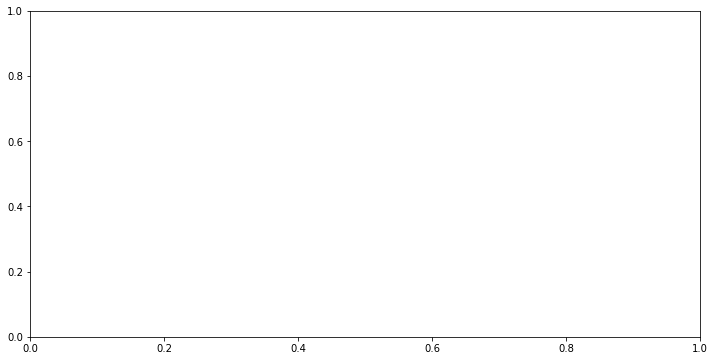

In [27]:
city = 'Athens'
country = 'Greece'
year1=2013
year2=2017

lat,long = get_lat_long(city, country)
compare_rain_years(lat, long,year1,year2)

In [ ]:
city = 'Rome'
country = 'Italy'
year1=2013
year2=2017

lat,long = get_lat_long(city, country)
compare_rain_years(lat, long,year1,year2)

In [ ]:
city = 'Athens'
country = 'Greece'
year1=2013
year2=2017

lat,long = get_lat_long(city, country)
compare_temp_years(lat, long,year1,year2)

In [ ]:
city = 'Rome'
country = 'Italy'
year1=2013
year2=2017

lat,long = get_lat_long(city, country)
compare_temp_years(lat, long,year1,year2)

In [ ]:
time_t = '2013-01-01T00:00:00,2017-12-31T23:59:59'
lat,long = -1.286046,36.820959